In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.set_loglevel("info")

In [ ]:
BASE_DATA_DIR = "/home/fbqc9/Workspace/MCLLM_DATA/DATA"

# Input files
df_file = BASE_DATA_DIR + "/evaluation/results/BP_0.3/evaluation_all.tsv"
out_folder = BASE_DATA_DIR + "/evaluation/results/BP_0.3/"

# Set to None if you don't want to use it. Results will not be grouped/filtered by team
names_file = {
  'filename': ['naive.tsv', 'diamondblast.tsv', 'deepgose.tsv', 'sprof.tsv', 'transfew.tsv', 'Structure.tsv', 'Sequence.tsv', 'Interpro.tsv', 'Text.tsv', 'Consensus_w_structure.tsv', 'Consensus_wO_structure.tsv'],
  'group': ['naive', 'diamondblast', 'deepgose', 'sprof', 'transfew', 'structure', 'sequence', 'interpro', 'text', 'FunBind_S', None],
  'label': ['Naive', 'DiamondBlast', 'DeepGO-SE', 'SPROF-GO', 'Transfew', 'Structure', 'Sequence', 'Interpro', 'Text', 'FunBind_S', None],
}

# Cumulate the last column of the cols variable, e.g. "pr" --> precision, so that the curves are monotonic as in CAFA
cumulate = True

# Add extreme points to the precision-recall curves (0, 1) and (1, 0)
add_extreme_points = False

# Methods with coverage below this threshold will not be plotted
coverage_threshold = 0.1

# Select a metric
metric, cols = ('f', ['rc', 'pr'])
# metric, cols =  ('f_w', ['rc_w', 'pr_w'])
# metric, cols =  ('f_micro', ['rc_micro', 'pr_micro'])
# metric, cols =  ('f_micro_w', ['rc_micro_w', 'pr_micro_w'])
# metric, cols = ('s_w', ['ru_w', 'mi_w'])

In [78]:
# Map column names to full names (for axis labels)
axis_title_dict = {'pr': 'Precision', 'rc': 'Recall', 'f': 'F-score', 'pr_w': 'Weighted Precision', 'rc_w': 'Weighted Recall', 'f_w': 'Weighted F-score', 'mi': 'Misinformation (Unweighted)', 'ru': 'Remaining Uncertainty (Unweighted)', 'mi_w': 'Misinformation', 'ru_w': 'Remaining Uncertainty', 's': 'S-score', 'pr_micro': 'Precision (Micro)', 'rc_micro': 'Recall (Micro)', 'f_micro': 'F-score (Micro)', 'pr_micro_w': 'Weighted Precision (Micro)', 'rc_micro_w': 'Weighted Recall (Micro)', 'f_micro_w': 'Weighted F-score (Micro)'}

# Map ontology namespaces to full names (for plot titles)
# ontology_dict = {'biological_process': 'BPO', 'molecular_function': 'MFO', 'cellular_component': 'CCO'}
ontology_dict = {'biological_process': 'Biological Process', 'molecular_function': 'Molecular Function', 'cellular_component': 'Cellular Component'}

In [79]:
df = pd.read_csv(df_file, sep="\t")
df

,filename,ns,tau,n,tp,fp,fn,pr,rc,cov,...,pr_w,rc_w,cov_w,mi_w,ru_w,f_w,s_w,pr_micro_w,rc_micro_w,f_micro_w
0,naive.tsv,biological_process,0.001,282.0,9.5674,411.4326,7.8121,0.0227,0.5707,1.0000,...,0.0191,0.4987,1.0000,480.1992,11.3983,0.0369,480.3345,0.0191,0.4513,0.0367
1,naive.tsv,biological_process,0.002,282.0,9.3475,363.6525,8.0319,0.0251,0.5530,1.0000,...,0.0202,0.4718,1.0000,435.8407,11.7930,0.0387,436.0002,0.0202,0.4323,0.0386
2,naive.tsv,biological_process,0.003,282.0,9.3369,335.6631,8.0426,0.0271,0.5527,1.0000,...,0.0231,0.4717,1.0000,379.7137,11.7993,0.0440,379.8970,0.0231,0.4320,0.0438
3,naive.tsv,biological_process,0.004,282.0,9.2376,310.7624,8.1418,0.0289,0.5456,1.0000,...,0.0252,0.4634,1.0000,338.8570,11.9989,0.0479,339.0693,0.0252,0.4224,0.0476
4,naive.tsv,biological_process,0.005,282.0,9.1986,299.8014,8.1809,0.0298,0.5431,1.0000,...,0.0261,0.4579,1.0000,324.6296,12.0800,0.0494,324.8543,0.0261,0.4185,0.0491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10914,Consensus_wo_structure.tsv,biological_process,0.994,4.0,0.0922,0.0142,17.2872,0.8000,0.0039,0.0142,...,0.7500,0.0024,0.0142,0.0163,20.7252,0.0047,20.7252,0.7479,0.0023,0.0046
10915,Consensus_wo_structure.tsv,biological_process,0.995,4.0,0.0922,0.0142,17.2872,0.8000,0.0039,0.0142,...,0.7500,0.0024,0.0142,0.0163,20.7252,0.0047,20.7252,0.7479,0.0023,0.0046
10916,Consensus_wo_structure.tsv,biological_process,0.996,3.0,0.0816,0.0106,17.2979,0.7500,0.0036,0.0106,...,0.6667,0.0022,0.0106,0.0109,20.7329,0.0043,20.7329,0.7877,0.0020,0.0039
10917,Consensus_wo_structure.tsv,biological_process,0.997,1.0,0.0035,0.0071,17.3759,0.3333,0.0002,0.0035,...,0.0000,0.0000,0.0035,0.0106,20.7735,0.0000,20.7735,0.0000,0.0000,0.0000


In [80]:
# Set method information (optional)
if names_file is None:
    df['group'] = df['filename']
    df['label'] = df['filename']
    df['is_baseline'] = False
else:
    # methods = pd.read_csv(names_file, delim_whitespace=True, header=0)
    # df = pd.merge(df, methods, on='filename', how='left')
    methods = pd.DataFrame.from_dict(names_file)
    df = pd.merge(df, methods, on='filename', how='left')
    df['group'].fillna(df['filename'], inplace=True)
    df['label'].fillna(df['filename'], inplace=True)
    if 'is_baseline' not in df:
        df['is_baseline'] = False
    else:
        df['is_baseline'].fillna(False, inplace=True)
    # print(methods)
df = df.drop(columns='filename').set_index(['group', 'label', 'ns', 'tau'])
df

/tmp/ipykernel_3371604/2355692437.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['group'].fillna(df['filename'], inplace=True)
/tmp/ipykernel_3371604/2355692437.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

n  \
group                      label                      ns                 tau            
naive                      Naive                      biological_process 0.001  282.0   
                                                                         0.002  282.0   
                                                                         0.003  282.0   
                                                                         0.004  282.0   
                                                                         0.005  282.0   
...                                                                               ...   
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process 0.994    4.0   
                                                                         0.995    4.0   
                                                                         0.996    3.0   
                                                                         0.997    1.0   
                                                                         0.998    1.0   

                                                                                    tp  \
group                      label                      ns                 tau             
naive                      Naive                      biological_process 0.001  9.5674   
                                                                         0.002  9.3475   
                                                                         0.003  9.3369   
                                                                         0.004  9.2376   
                                                                         0.005  9.1986   
...                                                                                ...   
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process 0.994  0.0922   
                                                                         0.995  0.0922   
                                                                         0.996  0.0816   
                                                                         0.997  0.0035   
                                                                         0.998  0.0035   

                                                                                      fp  \
group                      label                      ns                 tau               
naive                      Naive                      biological_process 0.001  411.4326   
                                                                         0.002  363.6525   
                                                                         0.003  335.6631   
                                                                         0.004  310.7624   
                                                                         0.005  299.8014   
...                                                                                  ...   
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process 0.994    0.0142   
                                                                         0.995    0.0142   
                                                                         0.996    0.0106   
                                                                         0.997    0.0071   
                                                                         0.998    0.0035   

                                                                                     fn  \
group                      label                      ns                 tau              
naive                      Naive                      biological_process 0.001   7.8121   
                                                                         0.002   8.0319   
                                                                         0.003   8.0426   
                                                                         0.004   8.1418   
            

In [81]:
# Filter by coverage
df = df[df['cov'] >= coverage_threshold]
df

n  \
group                      label                      ns                 tau            
naive                      Naive                      biological_process 0.001  282.0   
                                                                         0.002  282.0   
                                                                         0.003  282.0   
                                                                         0.004  282.0   
                                                                         0.005  282.0   
...                                                                               ...   
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process 0.954   32.0   
                                                                         0.955   32.0   
                                                                         0.956   32.0   
                                                                         0.957   31.0   
                                                                         0.958   29.0   

                                                                                    tp  \
group                      label                      ns                 tau             
naive                      Naive                      biological_process 0.001  9.5674   
                                                                         0.002  9.3475   
                                                                         0.003  9.3369   
                                                                         0.004  9.2376   
                                                                         0.005  9.1986   
...                                                                                ...   
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process 0.954  0.5603   
                                                                         0.955  0.5532   
                                                                         0.956  0.5461   
                                                                         0.957  0.5319   
                                                                         0.958  0.5106   

                                                                                      fp  \
group                      label                      ns                 tau               
naive                      Naive                      biological_process 0.001  411.4326   
                                                                         0.002  363.6525   
                                                                         0.003  335.6631   
                                                                         0.004  310.7624   
                                                                         0.005  299.8014   
...                                                                                  ...   
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process 0.954    0.0390   
                                                                         0.955    0.0390   
                                                                         0.956    0.0390   
                                                                         0.957    0.0390   
                                                                         0.958    0.0390   

                                                                                     fn  \
group                      label                      ns                 tau              
naive                      Naive                      biological_process 0.001   7.8121   
                                                                         0.002   8.0319   
                                                                         0.003   8.0426   
                                                                         0.004   8.1418   
            

In [82]:
# Assign colors based on group
cmap = plt.get_cmap('tab20')
df['colors'] = df.index.get_level_values('group')
df['colors'] = pd.factorize(df['colors'])[0]
df['colors'] = df['colors'].apply(lambda x: cmap.colors[x % len(cmap.colors)])
df

/tmp/ipykernel_3371604/1899990328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = df.index.get_level_values('group')
/tmp/ipykernel_3371604/1899990328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = pd.factorize(df['colors'])[0]
/tmp/ipykernel_3371604/1899990328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

n  \
group                      label                      ns                 tau            
naive                      Naive                      biological_process 0.001  282.0   
                                                                         0.002  282.0   
                                                                         0.003  282.0   
                                                                         0.004  282.0   
                                                                         0.005  282.0   
...                                                                               ...   
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process 0.954   32.0   
                                                                         0.955   32.0   
                                                                         0.956   32.0   
                                                                         0.957   31.0   
                                                                         0.958   29.0   

                                                                                    tp  \
group                      label                      ns                 tau             
naive                      Naive                      biological_process 0.001  9.5674   
                                                                         0.002  9.3475   
                                                                         0.003  9.3369   
                                                                         0.004  9.2376   
                                                                         0.005  9.1986   
...                                                                                ...   
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process 0.954  0.5603   
                                                                         0.955  0.5532   
                                                                         0.956  0.5461   
                                                                         0.957  0.5319   
                                                                         0.958  0.5106   

                                                                                      fp  \
group                      label                      ns                 tau               
naive                      Naive                      biological_process 0.001  411.4326   
                                                                         0.002  363.6525   
                                                                         0.003  335.6631   
                                                                         0.004  310.7624   
                                                                         0.005  299.8014   
...                                                                                  ...   
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process 0.954    0.0390   
                                                                         0.955    0.0390   
                                                                         0.956    0.0390   
                                                                         0.957    0.0390   
                                                                         0.958    0.0390   

                                                                                     fn  \
group                      label                      ns                 tau              
naive                      Naive                      biological_process 0.001   7.8121   
                                                                         0.002   8.0319   
                                                                         0.003   8.0426   
                                                                         0.004   8.1418   
            

In [83]:
# Identify the best methods and thresholds
index_best = df.groupby(level=['group', 'ns'])[metric].idxmax() if metric in ['f', 'f_w', 'f_micro', 'f_micro_w'] else df.groupby(['group', 'ns'])[metric].idxmin()
index_best

group                       ns                
Consensus_wo_structure.tsv  biological_process    (Consensus_wo_structure.tsv, Consensus_wo_stru...
FunBind_S                   biological_process    (FunBind_S, FunBind_S, biological_process, 0.351)
deepgose                    biological_process     (deepgose, DeepGO-SE, biological_process, 0.262)
diamondblast                biological_process    (diamondblast, DiamondBlast, biological_proces...
interpro                    biological_process      (interpro, Interpro, biological_process, 0.367)
naive                       biological_process            (naive, Naive, biological_process, 0.318)
sequence                    biological_process      (sequence, Sequence, biological_process, 0.358)
sprof                       biological_process         (sprof, SPROF-GO, biological_process, 0.149)
structure                   biological_process    (structure, Structure, biological_process, 0.301)
text                        biological_process       

In [84]:
# Filter the dataframe for the best methods
df_methods = df.reset_index('tau').loc[[ele[:-1] for ele in index_best], ['tau', 'cov', 'colors'] + cols + [metric]].sort_index()

# Makes the curves monotonic. Cumulative max on the last column of the cols variable, e.g. "pr" --> precision
if cumulate:
    if metric in ['f', 'f_w', 'f_micro', 'f_micro_w']:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummax()
    else:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummin()


# Save to file
df_methods.drop(columns=['colors']).to_csv('{}/fig_{}.tsv'.format(out_folder, metric), float_format="%.3f", sep="\t")
df_methods

tau  \
group                      label                      ns                          
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process  0.001   
                                                      biological_process  0.002   
                                                      biological_process  0.003   
                                                      biological_process  0.004   
                                                      biological_process  0.005   
...                                                                         ...   
transfew                   Transfew                   biological_process  0.995   
                                                      biological_process  0.996   
                                                      biological_process  0.997   
                                                      biological_process  0.998   
                                                      biological_process  0.999   

                                                                             cov  \
group                      label                      ns                           
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process  1.0000   
                                                      biological_process  1.0000   
                                                      biological_process  1.0000   
                                                      biological_process  1.0000   
                                                      biological_process  1.0000   
...                                                                          ...   
transfew                   Transfew                   biological_process  0.1702   
                                                      biological_process  0.1489   
                                                      biological_process  0.1277   
                                                      biological_process  0.1206   
                                                      biological_process  0.1099   

                                                                                                                     colors  \
group                      label                      ns                                                                      
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
                                                      biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
                                                      biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
                                                      biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
                                                      biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
...                                                                                                                     ...   
transfew                   Transfew                   biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                                                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                                                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                                                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                                                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   

                                                                              rc  \
group                      label                      ns                           
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process  0.7608   

In [85]:
# Add first last points to precision and recall curves to improve APS calculation
def add_points(df_):
    df_ = pd.concat([df_.iloc[0:1], df_])
    df_.iloc[0, df_.columns.get_indexer(['tau', cols[0], cols[1]])] = [0, 1, 0]  # tau, rc, pr
    df_ = pd.concat([df_, df_.iloc[-1:]])
    df_.iloc[-1, df_.columns.get_indexer(['tau', cols[0], cols[1]])] = [1.1, 0, 1]
    return df_

if metric.startswith('f') and add_extreme_points:
    df_methods = df_methods.reset_index().groupby(['group', 'label', 'ns'], as_index=False).apply(add_points).set_index(['group', 'label', 'ns'])
df_methods

tau  \
group                      label                      ns                          
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process  0.001   
                                                      biological_process  0.002   
                                                      biological_process  0.003   
                                                      biological_process  0.004   
                                                      biological_process  0.005   
...                                                                         ...   
transfew                   Transfew                   biological_process  0.995   
                                                      biological_process  0.996   
                                                      biological_process  0.997   
                                                      biological_process  0.998   
                                                      biological_process  0.999   

                                                                             cov  \
group                      label                      ns                           
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process  1.0000   
                                                      biological_process  1.0000   
                                                      biological_process  1.0000   
                                                      biological_process  1.0000   
                                                      biological_process  1.0000   
...                                                                          ...   
transfew                   Transfew                   biological_process  0.1702   
                                                      biological_process  0.1489   
                                                      biological_process  0.1277   
                                                      biological_process  0.1206   
                                                      biological_process  0.1099   

                                                                                                                     colors  \
group                      label                      ns                                                                      
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
                                                      biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
                                                      biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
                                                      biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
                                                      biological_process  (0.5490196078431373, 0.33725490196078434, 0.29...   
...                                                                                                                     ...   
transfew                   Transfew                   biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                                                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                                                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                                                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   
                                                      biological_process  (0.17254901960784313, 0.6274509803921569, 0.17...   

                                                                              rc  \
group                      label                      ns                           
Consensus_wo_structure.tsv Consensus_wo_structure.tsv biological_process  0.7608   

In [86]:
# Filter the dataframe for the best method and threshold
df_best = df.loc[index_best, ['cov', 'colors'] + cols + [metric]]
df_best

,,,,cov,colors,rc,pr,f
group,label,ns,tau,,,,,
Consensus_wo_structure.tsv,Consensus_wo_structure.tsv,biological_process,0.362,0.9965,"(0.5490196078431373, 0.33725490196078434, 0.29...",0.4583,0.6056,0.5217
FunBind_S,FunBind_S,biological_process,0.351,1.0000,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.4555,0.6112,0.5220
deepgose,DeepGO-SE,biological_process,0.262,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.3641,0.3907,0.3769
diamondblast,DiamondBlast,biological_process,0.458,0.1986,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.1241,0.3288,0.1801
interpro,Interpro,biological_process,0.367,0.7979,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.3600,0.5520,0.4358
naive,Naive,biological_process,0.318,1.0000,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.1837,0.3703,0.2455
sequence,Sequence,biological_process,0.358,0.9716,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.3566,0.5635,0.4368
sprof,SPROF-GO,biological_process,0.149,0.9184,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.3169,0.4471,0.3709
structure,Structure,biological_process,0.301,0.7553,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.2593,0.3897,0.3114


In [87]:
# Calculate average precision score 
if metric.startswith('f'):
    df_best['aps'] = df_methods.groupby(level=['group', 'label', 'ns'])[[cols[0], cols[1]]].apply(lambda x: (x[cols[0]].diff(-1).shift(1) * x[cols[1]]).sum())
df_best
df_best.to_csv('{}/aps.tsv'.format(out_folder), float_format="%.4f", sep="\t")

In [88]:
# Calculate the max coverage across all thresholds
df_best['max_cov'] = df_methods.groupby(level=['group', 'label', 'ns'])['cov'].max()
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov
group,label,ns,tau,,,,,,,
Consensus_wo_structure.tsv,Consensus_wo_structure.tsv,biological_process,0.362,0.9965,"(0.5490196078431373, 0.33725490196078434, 0.29...",0.4583,0.6056,0.5217,0.438469,1.0000
FunBind_S,FunBind_S,biological_process,0.351,1.0000,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.4555,0.6112,0.5220,0.443002,1.0000
deepgose,DeepGO-SE,biological_process,0.262,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.3641,0.3907,0.3769,0.292593,1.0000
diamondblast,DiamondBlast,biological_process,0.458,0.1986,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.1241,0.3288,0.1801,0.010026,0.1986
interpro,Interpro,biological_process,0.367,0.7979,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.3600,0.5520,0.4358,0.300392,0.7979
naive,Naive,biological_process,0.318,1.0000,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.1837,0.3703,0.2455,0.116261,1.0000
sequence,Sequence,biological_process,0.358,0.9716,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.3566,0.5635,0.4368,0.320262,1.0000
sprof,SPROF-GO,biological_process,0.149,0.9184,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.3169,0.4471,0.3709,0.279777,1.0000
structure,Structure,biological_process,0.301,0.7553,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.2593,0.3897,0.3114,0.197149,0.7553


In [89]:
# Set a label column for the plot legend
df_best['label'] = df_best.index.get_level_values('label')
if 'aps' not in df_best.columns:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} C={x['max_cov']:.3f})", axis=1)
else:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} APS={x['aps']:.3f} C={x['max_cov']:.3f})", axis=1)
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov,label
group,label,ns,tau,,,,,,,,
Consensus_wo_structure.tsv,Consensus_wo_structure.tsv,biological_process,0.362,0.9965,"(0.5490196078431373, 0.33725490196078434, 0.29...",0.4583,0.6056,0.5217,0.438469,1.0000,Consensus_wo_structure.tsv (F=0.522 APS=0.438 ...
FunBind_S,FunBind_S,biological_process,0.351,1.0000,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.4555,0.6112,0.5220,0.443002,1.0000,FunBind_S (F=0.522 APS=0.443 C=1.000)
deepgose,DeepGO-SE,biological_process,0.262,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.3641,0.3907,0.3769,0.292593,1.0000,DeepGO-SE (F=0.377 APS=0.293 C=1.000)
diamondblast,DiamondBlast,biological_process,0.458,0.1986,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.1241,0.3288,0.1801,0.010026,0.1986,DiamondBlast (F=0.180 APS=0.010 C=0.199)
interpro,Interpro,biological_process,0.367,0.7979,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.3600,0.5520,0.4358,0.300392,0.7979,Interpro (F=0.436 APS=0.300 C=0.798)
naive,Naive,biological_process,0.318,1.0000,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.1837,0.3703,0.2455,0.116261,1.0000,Naive (F=0.245 APS=0.116 C=1.000)
sequence,Sequence,biological_process,0.358,0.9716,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.3566,0.5635,0.4368,0.320262,1.0000,Sequence (F=0.437 APS=0.320 C=1.000)
sprof,SPROF-GO,biological_process,0.149,0.9184,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.3169,0.4471,0.3709,0.279777,1.0000,SPROF-GO (F=0.371 APS=0.280 C=1.000)
structure,Structure,biological_process,0.301,0.7553,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.2593,0.3897,0.3114,0.197149,0.7553,Structure (F=0.311 APS=0.197 C=0.755)


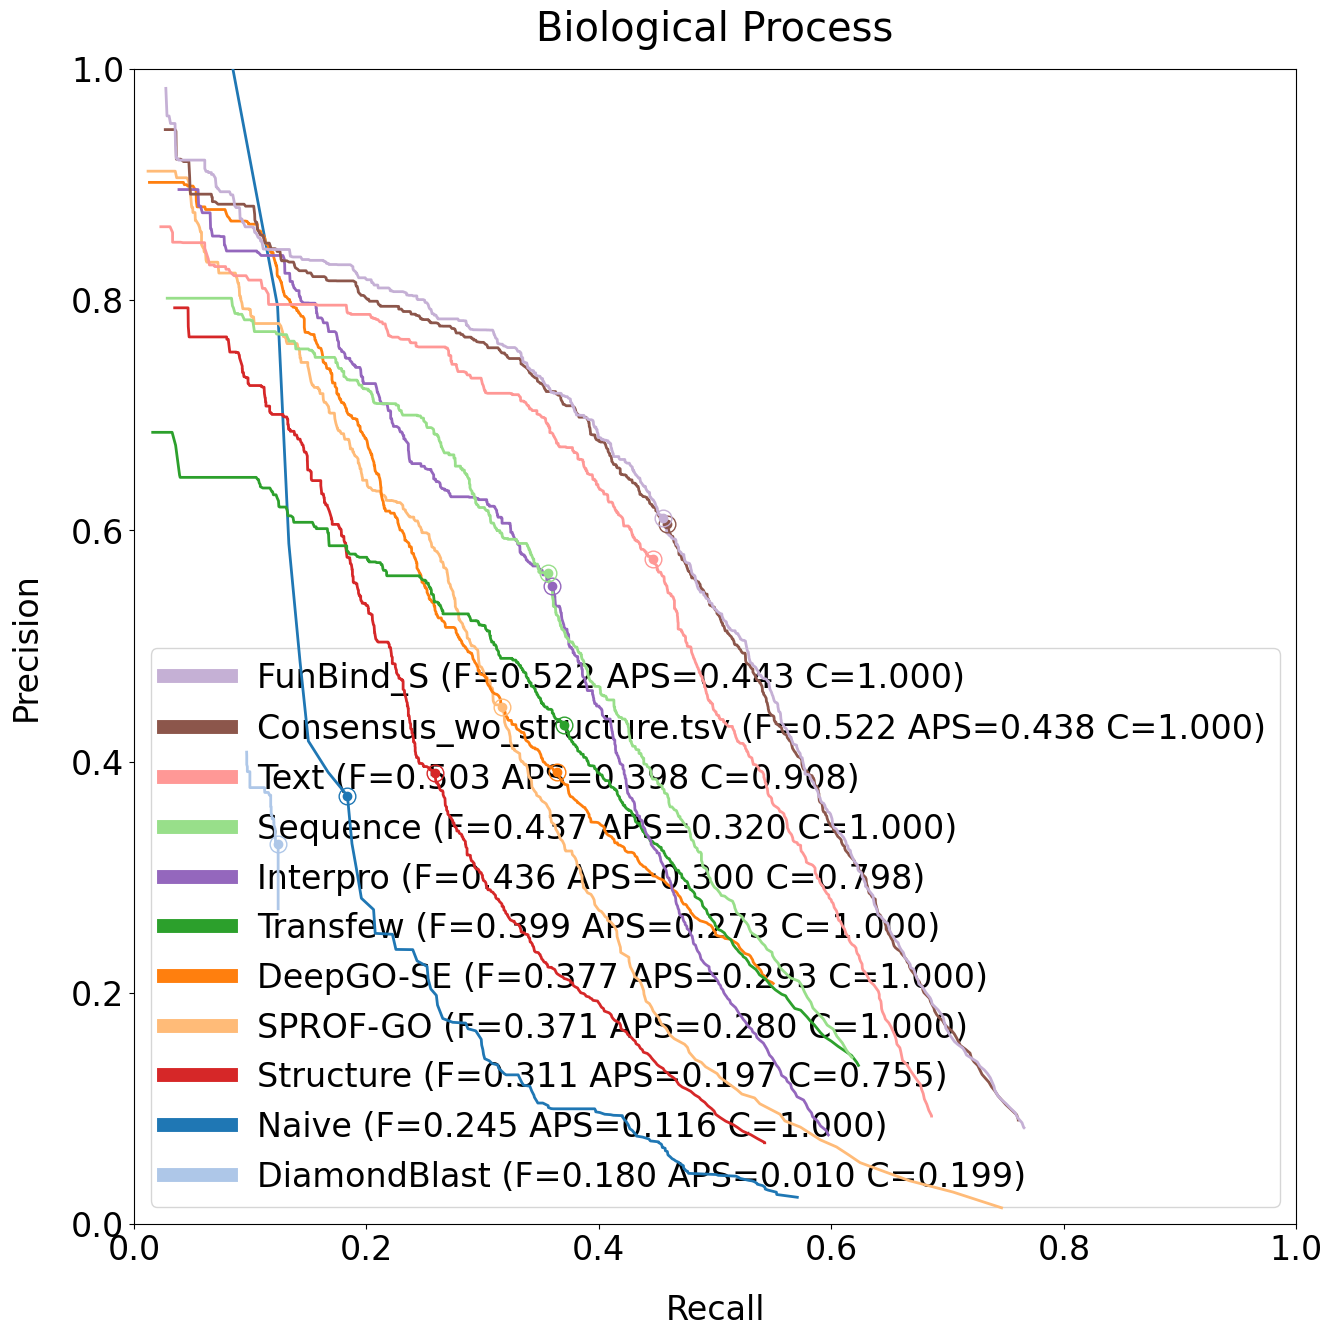

In [90]:
# Generate the figures
plt.rcParams.update({'font.size': 24, 'legend.fontsize': 24})

# F-score contour lines
x = np.arange(0.01, 1, 0.01)
y = np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = 2 * X * Y / (X + Y)

for ns, df_g in df_best.groupby(level='ns'):
    fig, ax = plt.subplots(figsize=(15, 15))

     # Contour lines. At the moment they are provided only for the F-score
    #if metric.startswith('f'):
        #CS = ax.contour(X, Y, Z, np.arange(0.1, 1.0, 0.1), colors='gray')
     #   ax.clabel(CS, inline=True) #, fontsize=10)

    # Iterate methods
    for i, (index, row) in enumerate(df_g.sort_values(by=[metric, 'max_cov'], ascending=[False if metric.startswith('f') else True, False]).iterrows()):
        data = df_methods.loc[index[:-1]]
        
        # Precision-recall or mi-ru curves
        ax.plot(data[cols[0]], data[cols[1]], color=row['colors'], label=row['label'], lw=2, zorder=500-i)
        
        # F-max or S-min dots
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=12, mfc='none', zorder=1000-i)
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=6, zorder=1000-i)

    # Set axes limit
    if metric.startswith('f'):
        plt.xlim(0, 1)
        plt.ylim(0, 1)
   
    # plt.xlim(0, max(1, df_best.loc[:,:,ns,:][cols[0]].max()))
    # plt.ylim(0, max(1, df_best.loc[:,:,ns,:][cols[1]].max()))

    # Set titles
    ax.set_title(ontology_dict.get(ns, ns), pad=20)
    ax.set_xlabel(axis_title_dict[cols[0]], labelpad=20)
    ax.set_ylabel(axis_title_dict[cols[1]], labelpad=20)
    
    # Legend
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    leg = ax.legend(markerscale=6)
    for legobj in leg.get_lines():
        legobj.set_linewidth(10.0)

    # Save figure on disk
    plt.savefig("{}/fig_{}_{}.png".format(out_folder, metric, ns), bbox_inches='tight', dpi=300, transparent=True)
    # plt.clf()